In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
# 결측치 처리 되어 있는 데이터임 (일단은)
df = pd.read_csv('../../dataset/processed/hair_salon_data.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1952 non-null   int64  
 1   book_tod           1952 non-null   object 
 2   book_dow           1952 non-null   object 
 3   book_category      1952 non-null   object 
 4   book_staff         1952 non-null   object 
 5   last_category      1952 non-null   object 
 6   last_staff         1952 non-null   object 
 7   last_day_services  1952 non-null   int64  
 8   last_receipt_tot   1952 non-null   float64
 9   last_dow           1952 non-null   object 
 10  last_tod           1952 non-null   object 
 11  last_noshow        1952 non-null   int64  
 12  last_prod_flag     1952 non-null   int64  
 13  last_cumrev        1952 non-null   int64  
 14  last_cumbook       1952 non-null   int64  
 15  last_cumstyle      1952 non-null   int64  
 16  last_cumcolor      1952 

,ID,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency,is_first_visit
0,0,afternoon,Wednesday,STYLE,JJ,Unknown,Unknown,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,1,morning,Wednesday,COLOR,JOANNE,Unknown,Unknown,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,2,afternoon,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,...,262,2,1,1,2,0,0,0,35,0
3,3,afternoon,Thursday,STYLE,KELLY,Unknown,Unknown,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,...,35,1,1,0,0,0,0,0,9,0
5,5,afternoon,Saturday,STYLE,KELLY,STYLE,KELLY,1,55.0,Saturday,...,90,2,2,0,0,0,0,0,14,0
6,6,afternoon,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Saturday,...,145,3,3,0,0,0,0,0,14,0
7,7,afternoon,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Saturday,...,145,3,3,0,0,0,0,0,14,0
8,8,evening,Thursday,STYLE,BECKY,Unknown,Unknown,0,0.0,Unknown,...,0,0,0,0,0,0,0,0,0,0
9,9,afternoon,Friday,STYLE,BECKY,STYLE,BECKY,1,76.0,Thursday,...,30,1,1,0,1,0,0,0,36,0


In [9]:
print(df['last_category'].unique())

['Unknown' 'COLOR' 'STYLE' 'MISC']


In [52]:
X = df.drop(columns='noshow')
y = df['noshow']

In [53]:
# 전처리(스케일링, 인코딩)

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 1. 먼저 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. 전처리기 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# 3. 전처리 적용
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [29]:
lr = LogisticRegression(class_weight='balanced', random_state=0)
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=0)

In [30]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# 예측
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]  # positive class 확률 (for ROC AUC)

# 주요 지표 출력
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Precision:", precision_score(y_test, y_pred))
print("📊 Recall:", recall_score(y_test, y_pred))
print("📊 F1 Score:", f1_score(y_test, y_pred))
print("📊 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 혼동 행렬
print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 상세 보고서
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Accuracy: 0.6854219948849105
📊 Precision: 0.23776223776223776
📊 Recall: 0.7083333333333334
📊 F1 Score: 0.35602094240837695
📊 ROC AUC Score: 0.7621477162293488

🔢 Confusion Matrix:
[[234 109]
 [ 14  34]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       343
           1       0.24      0.71      0.36        48

    accuracy                           0.69       391
   macro avg       0.59      0.70      0.57       391
weighted avg       0.86      0.69      0.74       391



📌 최적의 임계값: 0.15
🔍 Acuuracy at best threshold: 0.7852
🔍 Recall at best threshold: 0.5833
🔍 Precision at best threshold: 0.3043
🔍 F1 Score at best threshold: 0.4000

🔢 Confusion Matrix:
[[279  64]
 [ 20  28]]


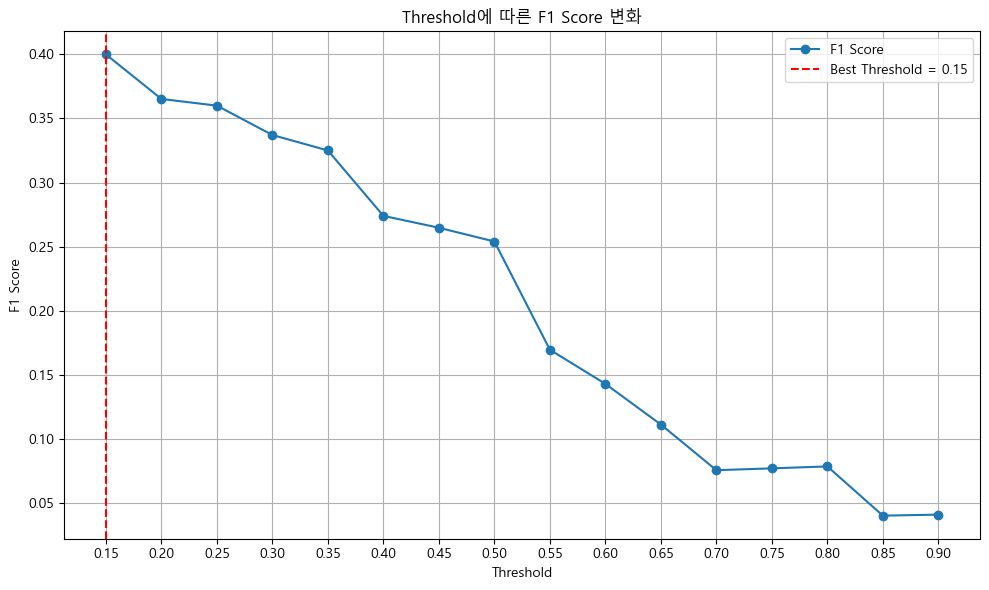

In [61]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier(class_weight='balanced', random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.15, 0.91, 0.05)
accuracy = []
recalls = []
precisions = []
f1s = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    precisions.append(precision_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))

best_idx = np.argmax(recalls) # 기준 설정
best_threshold = thresholds[best_idx]

print(f"📌 최적의 임계값: {best_threshold:.2f}")
print(f"🔍 Acuuracy at best threshold: {accuracy[best_idx]:.4f}")
print(f"🔍 Recall at best threshold: {recalls[best_idx]:.4f}")
print(f"🔍 Precision at best threshold: {precisions[best_idx]:.4f}")
print(f"🔍 F1 Score at best threshold: {f1s[best_idx]:.4f}")

# 최적 threshold 기준 예측 및 confusion matrix 출력
y_pred_final = (y_proba >= best_threshold).astype(int)
print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

# F1 Score 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1s, marker='o', linestyle='-', label='F1 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title("Threshold에 따른 F1 Score 변화")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.xticks(np.round(thresholds, 2))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Precision:", precision_score(y_test, y_pred))
print("📊 Recall:", recall_score(y_test, y_pred))
print("📊 F1 Score:", f1_score(y_test, y_pred))
print("📊 ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Accuracy: 0.8797953964194374
📊 Precision: 0.5333333333333333
📊 Recall: 0.16666666666666666
📊 F1 Score: 0.25396825396825395
📊 ROC AUC Score: 0.7353316326530612

🔢 Confusion Matrix:
[[336   7]
 [ 40   8]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       343
           1       0.53      0.17      0.25        48

    accuracy                           0.88       391
   macro avg       0.71      0.57      0.59       391
weighted avg       0.85      0.88      0.85       391



In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# 4. SMOTE 적용
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_resampled, y_train_resampled)

# 6. 예측
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# 7. 평가 지표 출력
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Precision:", precision_score(y_test, y_pred))
print("📊 Recall:", recall_score(y_test, y_pred))
print("📊 F1 Score:", f1_score(y_test, y_pred))
print("📊 ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Accuracy: 0.8567774936061381
📊 Precision: 0.35714285714285715
📊 Recall: 0.20833333333333334
📊 F1 Score: 0.2631578947368421
📊 ROC AUC Score: 0.7230624392614189

🔢 Confusion Matrix:
[[325  18]
 [ 38  10]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       343
           1       0.36      0.21      0.26        48

    accuracy                           0.86       391
   macro avg       0.63      0.58      0.59       391
weighted avg       0.83      0.86      0.84       391



In [48]:
X_train_resampled

array([[ 1.        ,  0.        ,  0.        , ..., -0.32505927,
        -0.69187343,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.32505927,
        -0.69187343,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.98138398,
         0.43696318,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.32505927,
         0.85598723,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.32505927,
        -0.69187343,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.32505927,
        -0.69187343,  0.        ]], shape=(2770, 58))

In [51]:
from collections import Counter
print(Counter(y_train_resampled))

Counter({0: 1385, 1: 1385})


In [39]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# 파이프라인 구성: 전처리 → SMOTE → 분류기
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

# 그리드서치 파라미터 설정
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

# GridSearchCV 정의
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',  # 재현율이 중요하면 'recall', 전체는 'f1'
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 학습
grid_search.fit(X_train, y_train)

# 최적 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 평가 결과 출력
print("✅ Best Parameters:", grid_search.best_params_)
print("📊 ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\_indexing.py", line 341, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\imblearn\pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\imblearn\pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\compose\_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\compose\_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\_indexing.py", line 343, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for dataframes.


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1. 데이터 불러오기
df = pd.read_csv('../../dataset/processed/hair_salon_data.csv')

# 3. 피처와 타겟 분리
X = df.drop(columns=['noshow'])
y = df['noshow']

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 5. 전처리 구성 (열 타입 기준 자동 선택)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), selector(dtype_include='object')),
        ('num', StandardScaler(), selector(dtype_include=['int64', 'float64']))
    ]
)

# 6. 파이프라인 구성
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=0)),
    ('classifier', LogisticRegression(random_state=0))
])

# 7. 그리드 서치 설정
param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [200, 500]
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',  # 필요 시 'recall', 'roc_auc' 등으로 변경 가능
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 8. 학습
grid_search.fit(X_train, y_train)

# 9. 최적 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 10. 평가 출력
print("✅ Best Parameters:", grid_search.best_params_)
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Precision:", precision_score(y_test, y_pred))
print("📊 Recall:", recall_score(y_test, y_pred))
print("📊 F1 Score:", f1_score(y_test, y_pred))
print("📊 ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ Best Parameters: {'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 200, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
📊 Accuracy: 0.6828644501278772
📊 Precision: 0.2361111111111111
📊 Recall: 0.7083333333333334
📊 F1 Score: 0.3541666666666667
📊 ROC AUC Score: 0.7634839650145772

🔢 Confusion Matrix:
[[233 110]
 [ 14  34]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       343
           1       0.24      0.71      0.35        48

    accuracy                           0.68       391
   macro avg       0.59      0.69      0.57       391
weighted avg       0.86      0.68      0.74       391



In [45]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 데이터 수 확인
print("✅ SMOTE 적용 전:", X_train.shape, y_train.shape)
print("✅ SMOTE 적용 후 :", X_res.shape, y_res.shape)

# 클래스별 샘플 수 확인
from collections import Counter
print("📊 클래스 분포:", Counter(y_res))


ValueError: could not convert string to float: 'afternoon'